<h1><center>
Computational Notebook of "A sensitivity analysis of a regression model of ocean temperature"
</center></h1>

## Context


Can data-driven models for weather and climate predictions learn the underlying physics of the system against which they are trained? Or are they simply capable of identifying statistical patterns without any clear link to the underlying physics? In *["A sensitivity analysis of a regression model of ocean temperature"](https://www.cambridge.org/core/journals/environmental-data-science/article/sensitivity-analysis-of-a-regression-model-of-ocean-temperature/089EA5B347F262CEE0B4BDFFBA4E6FF5)*, Furner, R. at al. (2022) run a sensitivity analysis of a regression-based model of ocean temperature, trained against simulations from a 3D ocean model setup, demostrating that regression models are capable of learning much of the physics of the underlying system, such as currents and density.


### Purpose
This notebook aims to complement the science and methodological development embedded within the original paper, using an open infrastructure that allows users to combine interactive code with text and graphical objects, translating research outputs into findable, accessible, interoperable and reusable outputs and code.

### Description
*Describe the main features of the dataset/sensor, preprocessing, modelling or postprocessing routine*

#### Data
The training and validation data derive from running the Massachusetts Institute of Technology general circulation model ([MITgcm](https://zenodo.org/record/4672260#.ZFgb_S-B2pY)) —a physically based model capable of simulating the ocean or the atmosphere dynamics due to isomorphisms in the governing equations. This research project relies on a simple 2° sector configuration that captures the fundamental dynamics of the ocean, including a realistic overturning circulation. This configuration features a single ocean basin, with:
+ limited topography, 
+ simplified coastlines, and 
+ constant idealized forcing. 

The domain runs from 60°S to 60° N, and is just over 20° wide in longitude. The domain is bounded by land along its northern and southern edges, and a strip of land runs along the eastern/western boundary from 60° N to 40° S.  Below this, in the southernmost 20°, the simulator has a periodic boundary condition, allowing flow that exits to the east and west to return to the domain at the western and eastern boundary. The domain has flat-bottom bathymetry of 5,000 m over most of the domain, with a 2° region of 2,500-m depth at the southernmost 20° of the eastern edge.

The simulator has:

+ 42 depth levels, with the surface layer being the thinnest at 10 m, and the bottom 10 levels being the maximum at 250 m. + 11 cells in the longitudinal direction, and
+ 78 cells in the latitudinal direction.

The simulator has a 12-hr time step, with fields output daily. We focus on daily-mean outputs.

### Highlights

*Provide 3-5 bullet points that convey the use case’s core procedures. Each bullet point must have a maximum of 85 characters, including spaces.*
* Highlight 1
* Highlight 2

### Contributions
*Please indicate key contributions. Notebook authors (mandatory). Optional subheadings, used in published EDS book notebooks, are Dataset originator/creator, Dataset authors, Dataset documentation, Modelling codebase, Modelling publications, Modelling funding and Pipeline documentation. Feel free to add any of them or propose new ones to attribute relevant research contributions.*

#### Notebook
* Author (role), Affiliation, GitHub alias

:::{note}
*Optional: add credits or acknowledgements to data and/or model providers or authors of code snippets*
:::

## Load libraries
List libraries according to their role e.g. system/files manipulation i.e. os (first), data handling i.e. numpy, xarray (second), visualisation i.e. holoviews (third), etc. The cell below contains two libraries, `os` and `warning` which are common among the Python Jupyter notebooks. Don't remove them.*

In [5]:
#!/usr/bin/env python
# coding: utf-8
# 
# Script written by Rachel Furner
# Plots instantaneous fields from MITgcm dataset, for 
# various cross sections

import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../src/general/')

from constants import *
from view_secs import *

from IPython.display import Video, Image, HTML, display


In [3]:
dam, da = load_data(path_data)
da_x, da_y, da_z = da['X'], da['Y'], da['Z']

#--------------------------------------------------
# Set up bits to plot diffs between time t and t+1
#--------------------------------------------------

depth_arange = [0, 7, 15, 21, 28, 37, da_z.values.shape[0]-1]
min_value = min(
    np.nanmin(dam[0:,:,x_coord]), 
    np.nanmin(dam[1:,:,x_coord]),
    np.nanmin(dam[0,level,:,:]),
    np.nanmin(dam[1,level,:,:]),
    np.nanmin(dam[0,:,y_coord,:]), 
    np.nanmin(dam[0,:,y_coord,:]) 
)

max_value = max( 
    np.nanmax(dam[0:,:,x_coord]), 
    np.amax(dam[1:,:,x_coord]),
    np.nanmax(dam[0,level,:,:]), 
    np.amax(dam[1,level,:,:]),
    np.nanmax(dam[0,:,y_coord,:]), 
    np.amax(dam[0,:,y_coord,:]) 
)



Reading in ds ...
Shape: (2, 42, 78, 11)


In [6]:
i_a = "../outputs/figures/fig01a.png"
i_b = "../outputs/figures/fig01b.png"
i_c = "../outputs/figures/fig01c.png"
i_d = "../outputs/figures/fig01d.png"
i_e = "../outputs/figures/fig01e.png"
i_g = "../outputs/figures/fig01_cb.png"
i_h = "../outputs/figures/fig01_cbdiff.png"

HTML(f"""
    <div class="row">
            <img src={i_a} style="width:30%"> </img>
            <img src={i_b} style="width:30%"> </img>
            <img src={i_c} style="width:30%"> </img>
    </div>
    <div class="row">
            <img src={i_d} style="width:30%"> </img>
            <img src={i_e} style="width:30%"> </img>
    </div>
    <div class="row">
            <img src={i_g} style="width:30%"> </img>
            <img src={i_h} style="width:30%"> </img>
    </div>
    """)


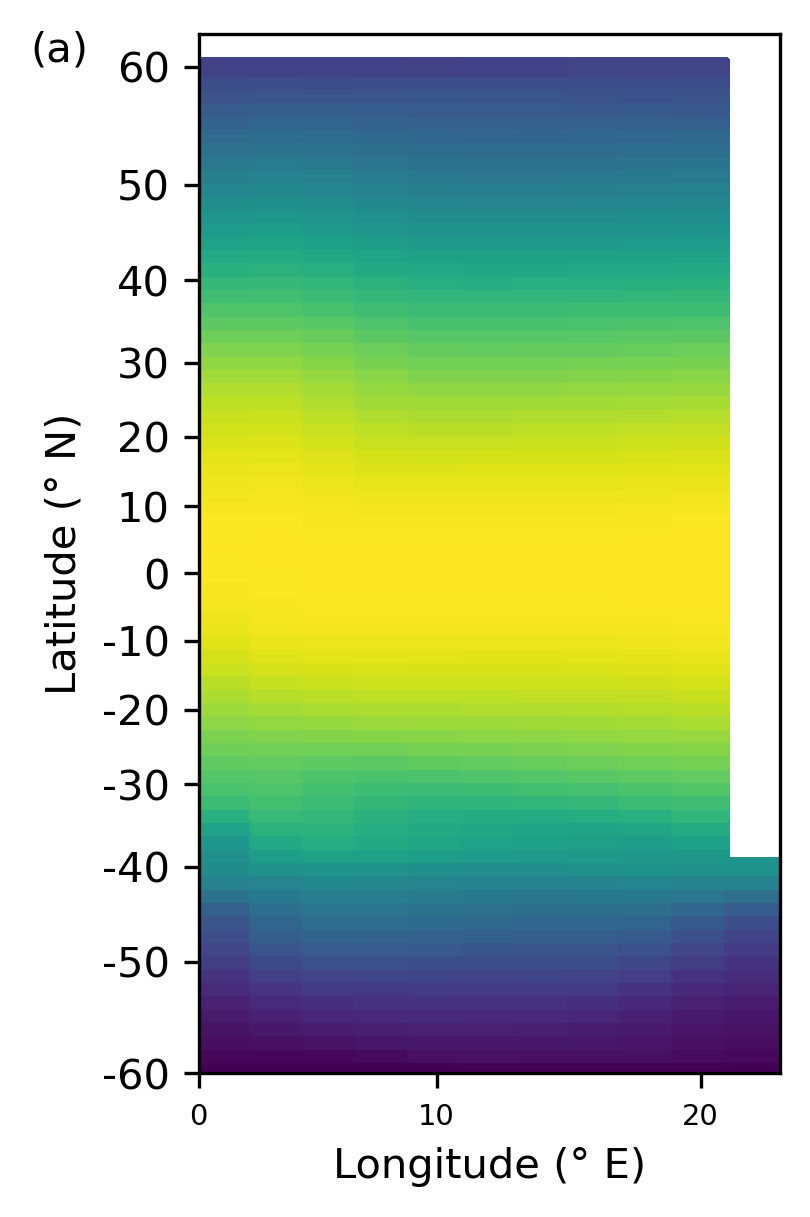

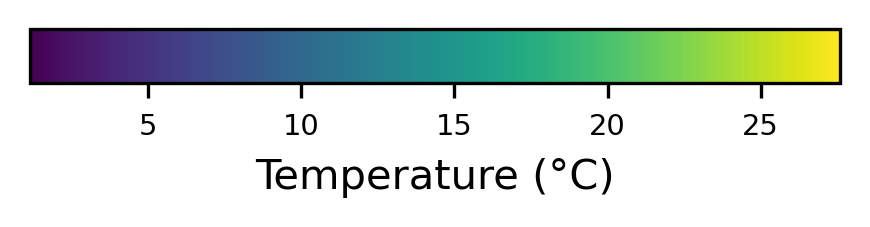

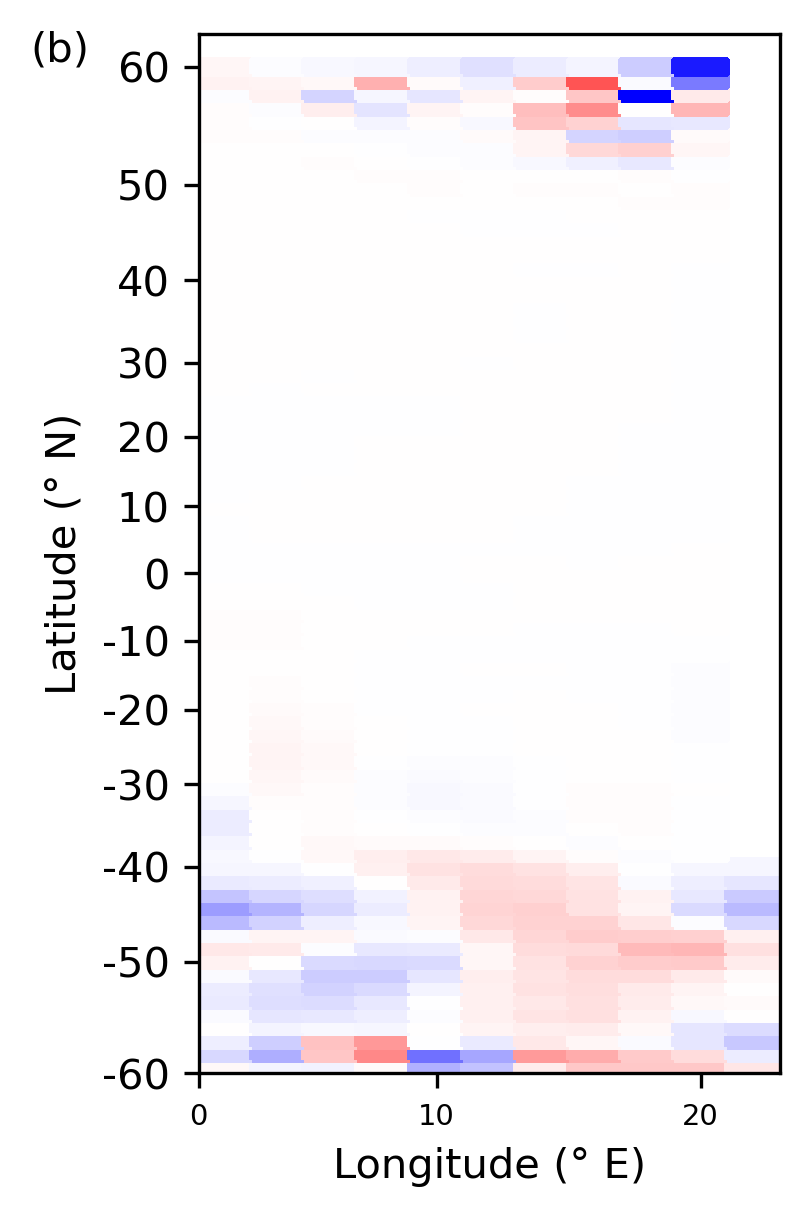

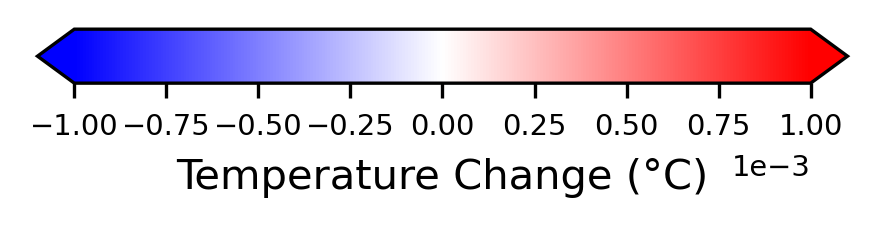

In [4]:
plt, im, ax = plot_depth_fields(
    dam[0,level,:,:],
    min_value, 
    max_value, 
    lon_label, 
    lat_label, 
    lon_arange, 
    lat_arange,
    da_x, 
    da_y,
    "fig01a.png",
    "(a)",
    None
)

fig = plt.figure( figsize=(3, .2), dpi=300 )
cbaxes = fig.add_axes([0.05, 0.05, 0.9, 0.9 ]) 
cb = plt.colorbar(im, ax=ax, orientation='horizontal', cax=cbaxes)
cb.set_label(cbar_label)    
plt.savefig(f"{plotdir}fig01_cb.png", format='png', bbox_inches = 'tight', pad_inches = 0.1)


plt, im, ax = plot_depth_fields(
    dam[0,level,:,:]-dam[1,level,:,:], 
    diff_min_value, 
    diff_max_value, 
    lon_label, 
    lat_label, 
    lon_arange, 
    lat_arange,
    da_x, 
    da_y,
    "fig01b.png",
    "(b)",
    'bwr'
    
)

fig = plt.figure( figsize=(3, .2), dpi=300 )
cbaxes = fig.add_axes([0.05, 0.05, 0.9, 0.9 ]) 
cb = plt.colorbar(im, ax=ax, orientation='horizontal', cax=cbaxes, extend='both')
cb.set_label(cbar_diff_label)    
cb.formatter.set_powerlimits((-2, 2))
cb.update_ticks()
plt.savefig(f"{plotdir}fig01_cbdiff.png", format='png', bbox_inches = 'tight', pad_inches = 0.1)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

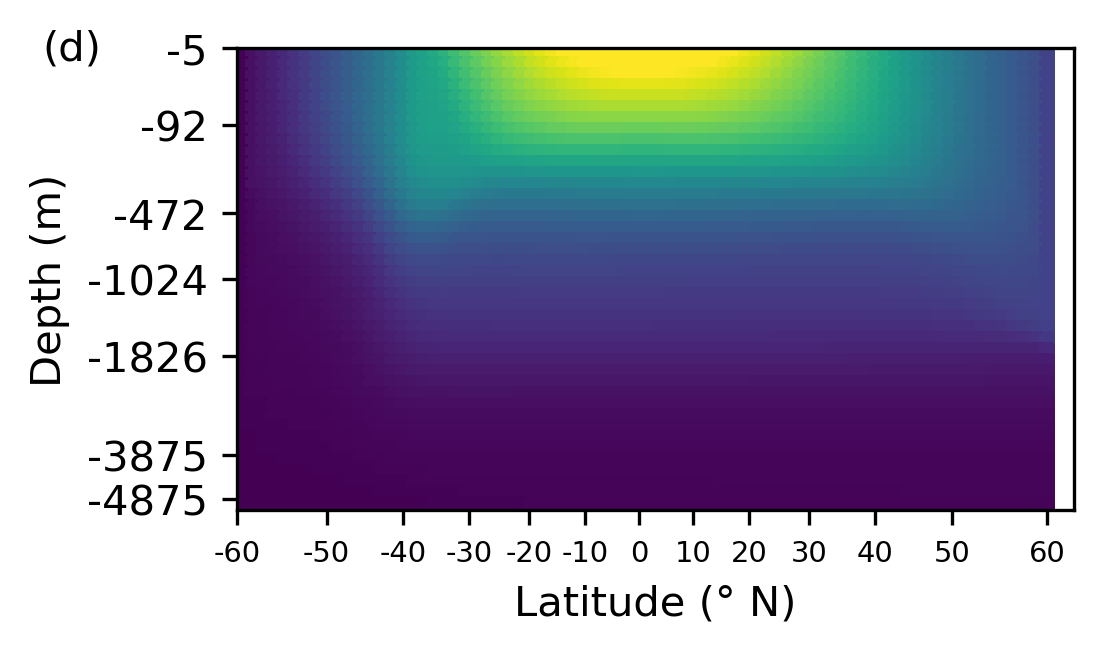

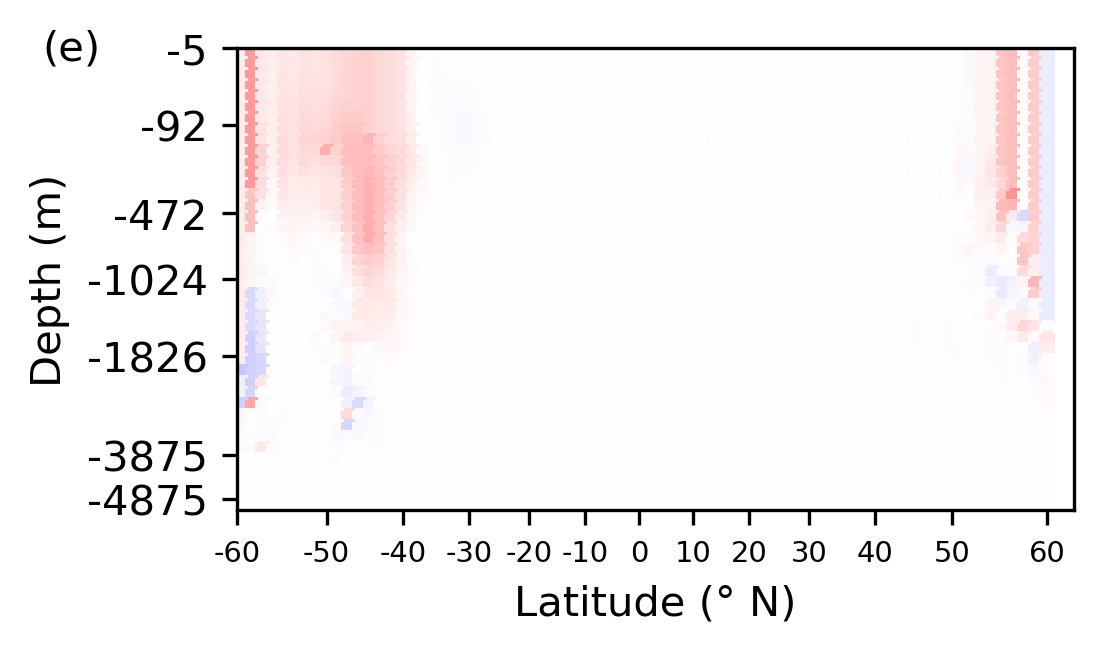

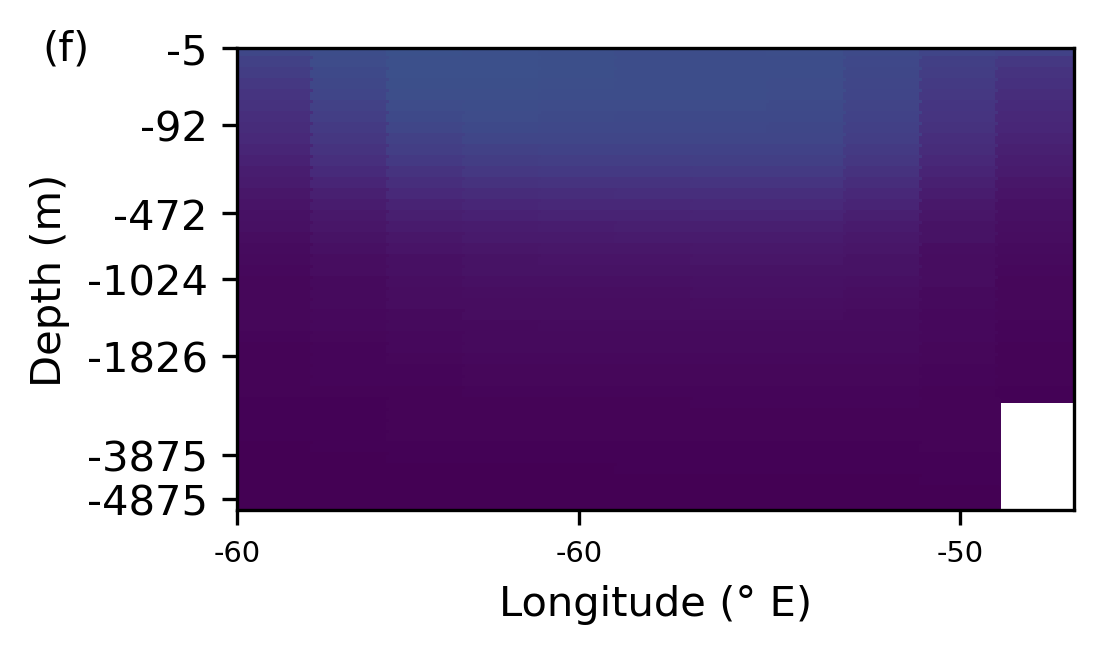

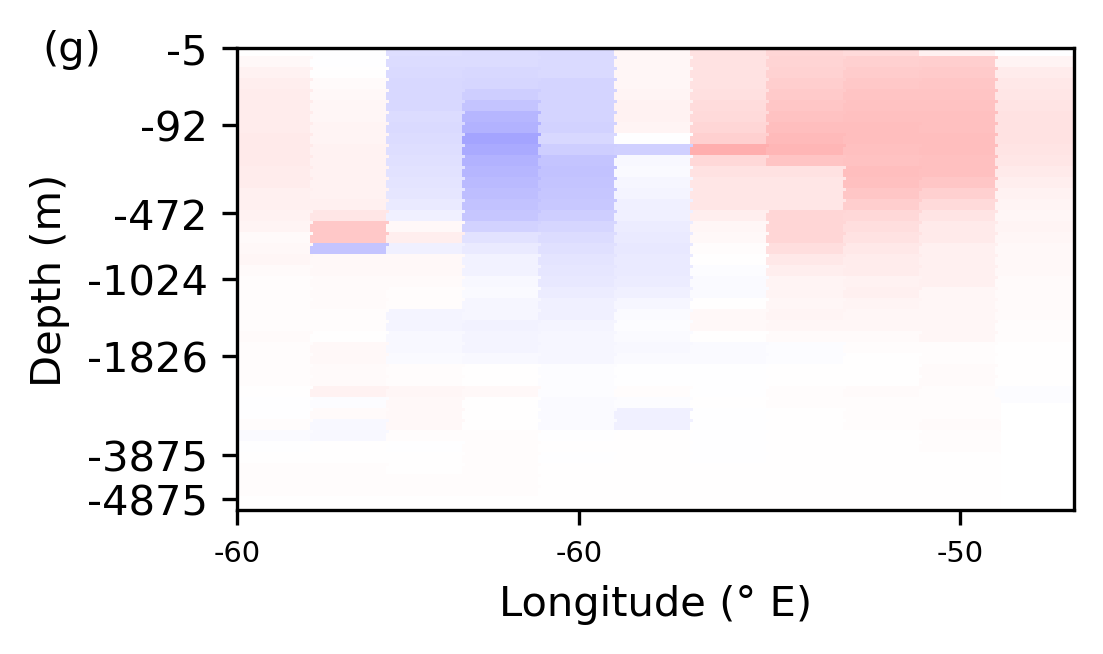

In [5]:
plot_cross_sections(
    dam[0,:,:,x_coord],
    min_value, 
    max_value,
    lat_label,
    depth_label,
    lat_arange,
    depth_arange,
    da_y,
    da_z,
    "fig01d.png",
    "(d)",
    None
    
)

plot_cross_sections(
    dam[0,:,:,x_coord]-dam[1,:,:,x_coord],
    diff_min_value, 
    diff_max_value,
    lat_label,
    depth_label,
    lat_arange,
    depth_arange,
    da_y,
    da_z,
    "fig01e.png",
    "(e)",
    'bwr'
    
)

plot_cross_sections(
    dam[0,:,y_coord,:],
    min_value, 
    max_value,
    lon_label,
    depth_label,
    lon_arange,
    depth_arange,
    da_y,
    da_z,
    "fig01f.png",
    "(f)",
    None
    
)

plot_cross_sections(
    dam[0,:,y_coord,:]-dam[1,:,y_coord,:],
    diff_min_value, 
    diff_max_value,
    lon_label,
    depth_label,
    lon_arange,
    depth_arange,
    da_y,
    da_z,
    "fig01g.png",
    "(g)",
    'bwr'
    
)

## Set project structure
*The cell below creates a separate folder to save the notebook outputs. This facilitates the reader to inspect inputs/outputs stored within a defined destination folder. Don't remove the lines below.*

In [ ]:
notebook_folder = './notebook'
if not os.path.exists(notebook_folder):
    os.makedirs(notebook_folder)

## Load data/model
*Load full dataset or model from original or mirror sources. If the license of the dataset/model permits, we suggest creating sample data (preprocessed) or model mirror for the notebook stored in a data repository e.g. Zenodo.*

### Data

The training and validation data derive from running the Massachusetts Institute of Technology general circulation model (MITgcm) —a physically based model capable of simulating the ocean or the atmosphere dynamics due to isomorphisms in the governing equations. This research project relies on a simple 2° sector configuration that captures the fundamental dynamics of the ocean, including a realistic overturning circulation. This configuration features a single ocean basin, with:
+ limited topography, 
+ simplified coastlines, and 
+ constant idealized forcing. 

The domain runs from 60°S to 60° N, and is just over 20° wide in longitude. The domain is bounded by land along its northern and southern edges, and a strip of land runs along the eastern/western boundary from 60° N to 40° S.  Below this, in the southernmost 20°, the simulator has a periodic boundary condition, allowing flow that exits to the east and west to return to the domain at the western and eastern boundary. The domain has flat-bottom bathymetry of 5,000 m over most of the domain, with a 2° region of 2,500-m depth at the southernmost 20° of the eastern edge.

The simulator has:

+ 42 depth levels, with the surface layer being the thinnest at 10 m, and the bottom 10 levels being the maximum at 250 m. + 11 cells in the longitudinal direction, and
+ 78 cells in the latitudinal direction.

The simulator has a 12-hr time step, with fields output daily. We focus on daily-mean outputs.


## Visualisation
*Create a visual narrative of the dataset! We suggest exploring libraries suited for interactive plotting e.g. python (Holoviews, Panel, Bokeh).*

## Summary
*Provide 3-5 bullet points summarising the main aspects of the dataset and tools covered in the notebook.*

* Sentence 1 e.g. `tool-name` to perform...
* Sentence 2 e.g. `tool-name` to perform...

## Additional information
**Dataset**: Type here details of dataset(s) version.

**Codebase**: Type here details of codebase version (only for notebooks categorised under modelling/preprocesing/post-processing themes).

**License**: The code in this notebook is licensed under the MIT License. The Environmental Data Science book is licensed under the Creative Commons by Attribution 4.0 license. See further details [here](https://github.com/alan-turing-institute/environmental-ds-book/blob/master/LICENSE.md).

**Contact**: If you have any suggestion or report an issue with this notebook, feel free to [create an issue](https://github.com/alan-turing-institute/environmental-ds-book/issues/new/choose) or send a direct message to [environmental.ds.book@gmail.com](mailto:environmental.ds.book@gmail.com).

In [ ]:
from datetime import date
print(f'Last tested: {date.today()}')